### Telecom Churn Case Study 

####  Problem Statement

       In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

    For many incumbent operators, retaining high profitable customers is the number one business goal.
    To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 

    In this Case Study, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

In [614]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)



## Loading the data 

In [615]:
telecom = pd.read_csv(r"D:\UpGrad\Machine Learning\Telecom Churn Case Study\telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [616]:
telecom.shape

(99999, 226)

In [617]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [618]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [619]:
# Copy the original dataframe before performing EDA
churn = telecom.copy()

In [620]:
churn.shape

(99999, 226)

### Data Preparation

In [621]:
# Checking the null columns 
churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [622]:
# Checking the percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

<font color = purple> *As we can see, there are several attributes with missing values in our data. We'll remove the rows for variables with a small percentage of missing values while dropping columns for those with over `70%` of their values missing.* </font>

##### Based on the data above some of the recharge columns has got minimum value of 1 so we will impute only those reacharge columns with 0 since '0' implies the customer has not recharged.

In [623]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [624]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))


In [625]:
# Make sure the values are imputed correctly
print("Null values percentage:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# Check the statistics
print("\n\n Statistics\n")
print(churn[zero_impute].describe(include='all'))


Null values percentage:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


 Statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_

In [626]:
# Checking the percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

#### Drop the rest of the columns with >= 70% Null values


In [627]:
churn.drop('date_of_last_rech_data_6',axis=1,inplace=True)
churn.drop('date_of_last_rech_data_7',axis=1,inplace=True)
churn.drop('date_of_last_rech_data_8',axis=1,inplace=True)
churn.drop('date_of_last_rech_data_9',axis=1,inplace=True)
churn.drop('count_rech_2g_6',axis=1,inplace=True)
churn.drop('count_rech_2g_7',axis=1,inplace=True)
churn.drop('count_rech_2g_8',axis=1,inplace=True)
churn.drop('count_rech_2g_9',axis=1,inplace=True)
churn.drop('count_rech_3g_6',axis=1,inplace=True)
churn.drop('count_rech_3g_7',axis=1,inplace=True)
churn.drop('count_rech_3g_8',axis=1,inplace=True)
churn.drop('count_rech_3g_9',axis=1,inplace=True)
churn.drop('arpu_3g_6',axis=1,inplace=True)
churn.drop('arpu_3g_7',axis=1,inplace=True)
churn.drop('arpu_3g_8',axis=1,inplace=True)
churn.drop('arpu_3g_9',axis=1,inplace=True)
churn.drop('arpu_2g_6',axis=1,inplace=True)
churn.drop('arpu_2g_7',axis=1,inplace=True)
churn.drop('arpu_2g_8',axis=1,inplace=True)
churn.drop('arpu_2g_9',axis=1,inplace=True)
churn.drop('night_pck_user_6',axis=1,inplace=True)
churn.drop('night_pck_user_7',axis=1,inplace=True)
churn.drop('night_pck_user_8',axis=1,inplace=True)
churn.drop('night_pck_user_9',axis=1,inplace=True)
churn.drop('fb_user_6',axis=1,inplace=True)
churn.drop('fb_user_7',axis=1,inplace=True)
churn.drop('fb_user_8',axis=1,inplace=True)
churn.drop('fb_user_9',axis=1,inplace=True)

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 198 entries, mobile_number to sep_vbc_3g
dtypes: float64(155), int64(35), object(8)
memory usage: 151.1+ MB


In [628]:
churn.shape

(99999, 198)

In [629]:
# Checking the percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [630]:
# create a list of column names for date columns 

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
            ]


In [631]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

#### Convert all the date columns from object datatype to datetime 

In [632]:
churn['last_date_of_month_6'] = pd.to_datetime(churn['last_date_of_month_6'],format='%m/%d/%Y')
churn['last_date_of_month_7'] = pd.to_datetime(churn['last_date_of_month_7'],format='%m/%d/%Y')
churn['last_date_of_month_8'] = pd.to_datetime(churn['last_date_of_month_8'],format='%m/%d/%Y')
churn['last_date_of_month_9'] = pd.to_datetime(churn['last_date_of_month_9'],format='%m/%d/%Y')
churn['date_of_last_rech_6'] = pd.to_datetime(churn['date_of_last_rech_6'],format='%m/%d/%Y')
churn['date_of_last_rech_7'] = pd.to_datetime(churn['date_of_last_rech_7'],format='%m/%d/%Y')
churn['date_of_last_rech_8'] = pd.to_datetime(churn['date_of_last_rech_8'],format='%m/%d/%Y')
churn['date_of_last_rech_9'] = pd.to_datetime(churn['date_of_last_rech_9'],format='%m/%d/%Y')



In [633]:
# create a new columns to calculate the last number of days in the months by subtracting from last_date_of_month_* for normalization

churn['no_days_last_rech_6'] = (churn['last_date_of_month_6'] - churn['date_of_last_rech_6']).abs().dt.days
churn['no_days_last_rech_7'] = (churn['last_date_of_month_7'] - churn['date_of_last_rech_7']).abs().dt.days
churn['no_days_last_rech_8'] = (churn['last_date_of_month_8'] - churn['date_of_last_rech_8']).abs().dt.days
churn['no_days_last_rech_9'] = (churn['last_date_of_month_9'] - churn['date_of_last_rech_9']).abs().dt.days


In [634]:
## Now lets drop all the date columns as its not required anymore for the analysis.

churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
 'last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1,inplace=True)


In [635]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,no_days_last_rech_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0

### Based on the above statistics we drop the columns which has all 0 values 

<font color = purple>###### The columns below holds only '0' values as the varience is 0 we will drop them as it doesnt add any value to the model.

<font color = blue>
    
1. loc_og_t2o_mou
2. std_og_t2o_mou
3. loc_ic_t2o_mou
4. std_og_t2c_mou_6
5. std_og_t2c_mou_7
6. std_og_t2c_mou_8
7. std_og_t2c_mou_9
8. std_ic_t2o_mou_6
9. std_ic_t2o_mou_7
10. std_ic_t2o_mou_8
11. std_ic_t2o_mou_9


In [636]:
churn.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
'std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],
           axis=1,inplace=True)

churn.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,no_days_last_rech_9
0,7000842753,109,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,9.0,15.0,23.0,2.0
1,7001865778,109,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,1

In [637]:
churn.shape

(99999, 183)

In [638]:
churn.describe()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,no_days_last_rech_9
count,9.999900e+04,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.0000

In [639]:
churn.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,no_days_last_rech_9
0,7000842753,109,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,9.0,15.0,23.0,2.0
1,7001865778,109,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,1

In [640]:
# Checking the percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)), 2)

mobile_number          0.00
circle_id              0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7    

#### The rest of the columns with < 10% missing values we will drop the rows.

In [641]:
# Create a list of all columns to drop < 10% missing rows.

missing_impute = ['onnet_mou_6',
'onnet_mou_7',
'onnet_mou_8',
'onnet_mou_9',
'offnet_mou_6',
'offnet_mou_7',
'offnet_mou_8',
'offnet_mou_9',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_ic_mou_9',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'roam_og_mou_9',
'loc_og_t2t_mou_6',
'loc_og_t2t_mou_7',
'loc_og_t2t_mou_8',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_6',
'loc_og_t2m_mou_7',
'loc_og_t2m_mou_8',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_t2c_mou_9',
'loc_og_mou_6',
'loc_og_mou_7',
'loc_og_mou_8',
'loc_og_mou_9',
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2t_mou_9',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2m_mou_9',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2f_mou_9',
'std_og_mou_6',
'std_og_mou_7',
'std_og_mou_8',
'std_og_mou_9',
'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'isd_og_mou_9',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'spl_og_mou_9',
'og_others_6',
'og_others_7',
'og_others_8',
'og_others_9',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2m_mou_8',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9',
'loc_ic_mou_6',
'loc_ic_mou_7',
'loc_ic_mou_8',
'loc_ic_mou_9',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_t2f_mou_9',
'std_ic_mou_6',
'std_ic_mou_7',
'std_ic_mou_8',
'std_ic_mou_9',
'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'spl_ic_mou_9',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'isd_ic_mou_9',
'ic_others_6',
'ic_others_7',
'ic_others_8',
'ic_others_9',
'no_days_last_rech_6',
'no_days_last_rech_7',
'no_days_last_rech_8',
'no_days_last_rech_9']

missing_impute

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [642]:
# Circle_id column has unique value so we will drop the column 

churn.circle_id.unique()

array([109], dtype=int64)

In [643]:
churn.drop('circle_id', axis =1 , inplace =True)

In [644]:
churn.shape

(99999, 182)

### High Value Customer Filtering

In [645]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [646]:
# Total recharge amount including voice calls & mobile data for the month of 6 & 7
churn['tot_calls_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['tot_calls_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [647]:
#Determine 70th percentile of average recharge amount

#Create new column with average of total recharge amounts in first 2 months i.e june & july months
churn['avg_recharge_amount_6_7'] = churn[['tot_calls_data_6', 'tot_calls_data_7']].mean(axis=1)
churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,no_days_last_rech_9,total_data_rech_6,total_data_rech_7,tot_calls_data_6,tot_calls_data_7,avg_recharge_amount_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,9.0,15.0,23.0,2.0,252.0,252.0,614.0,504.0,559.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.

In [648]:
churn['avg_recharge_amount_6_7'].quantile([0.7])

0.7    478.0
Name: avg_recharge_amount_6_7, dtype: float64

As seen the 70th percentile average is 478.0

In [649]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
filtered_churn = churn.loc[churn.avg_recharge_amount_6_7 >= churn.avg_recharge_amount_6_7.quantile(0.7), :]
filtered_churn = filtered_churn.reset_index(drop=True)
filtered_churn.shape

(30001, 187)

In [650]:
# Drop the columns which was created for filtering high value customers

filtered_churn = filtered_churn.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'tot_calls_data_6', 'tot_calls_data_7', 'avg_recharge_amount_6_7'], axis=1)
filtered_churn.shape

(30001, 182)

##### There are 30k customers who have recharged their mobiles above 70% and considered to be High Valued customers

In [651]:
# Checking the percentage of missing values
round(100*(filtered_churn.isnull().sum()/len(filtered_churn.index)), 2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            1.82
onnet_mou_7            1.79
onnet_mou_8            3.91
onnet_mou_9            6.34
offnet_mou_6           1.82
offnet_mou_7           1.79
offnet_mou_8           3.91
offnet_mou_9           6.34
roam_ic_mou_6          1.82
roam_ic_mou_7          1.79
roam_ic_mou_8          3.91
roam_ic_mou_9          6.34
roam_og_mou_6          1.82
roam_og_mou_7          1.79
roam_og_mou_8          3.91
roam_og_mou_9          6.34
loc_og_t2t_mou_6       1.82
loc_og_t2t_mou_7       1.79
loc_og_t2t_mou_8       3.91
loc_og_t2t_mou_9       6.34
loc_og_t2m_mou_6       1.82
loc_og_t2m_mou_7       1.79
loc_og_t2m_mou_8       3.91
loc_og_t2m_mou_9       6.34
loc_og_t2f_mou_6       1.82
loc_og_t2f_mou_7       1.79
loc_og_t2f_mou_8       3.91
loc_og_t2f_mou_9       6.34
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8    

In [652]:
## Drop the rows with < 10% missing or null values 
filtered_churn = filtered_churn.dropna()
filtered_churn.shape

(27121, 182)

#### After filtering high value customers and dropping < 10% nulls from the columns we have 27k rows for prediction.

### Derive or Tag the Churners for the month of 9

In [653]:
# calculate total incoming and outgoing voice calls based on usage
filtered_churn['total_voice_mou_9'] = filtered_churn.total_ic_mou_9 + filtered_churn.total_og_mou_9

In [654]:
# calculate 2g and 3g data consumption
filtered_churn['total_data_mb_9'] =  filtered_churn.vol_2g_mb_9 + filtered_churn.vol_3g_mb_9


In [655]:
# Create 'Churn' variable to tag customers based on total incoming and outgoing calls & mobile data usage in the month of september 
# those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn
# 1 - churn

filtered_churn['churn'] = filtered_churn.apply(lambda row: 1 if (row.total_voice_mou_9 == 0 and row.total_data_mb_9 == 0) else 0, axis=1)

filtered_churn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,no_days_last_rech_9,total_voice_mou_9,total_data_mb_9,churn
2,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.0,0.00,0.00,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.0,0.0,0.0,0.0,10.23,0.00,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,2.0,3.0,0.0,0.0,154.0,23.0,0.0,0.0,177.0,69.0,0.0,0.00,356.00,0.03,0.00,0.0,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,5.0,0.0,1.0,0.0,177.09,0.00,0
3,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.0,1.58,0.00,0.0,0.0,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.0,0.0,0.0,0.00,763.29,934.69,938.79,893.99,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.

#### From the above we are done with Good phase

In [656]:
filtered_churn.shape

(27121, 185)

### Action phase 

<font color = purple> Since it is crucial to identify high-churn-risk customers in this phase, we will derive some new features in comparison with the june & july months to that of 3'rd month Aug which will be our action phase variables.


In [657]:
### Find the difference between 8th month & average value of 6 & 7th months.
filtered_churn['arpu_diff'] = filtered_churn.arpu_8 - ((filtered_churn.arpu_6 + filtered_churn.arpu_7)/2)

filtered_churn['onnet_mou_diff'] = filtered_churn.onnet_mou_8 - ((filtered_churn.onnet_mou_6 + filtered_churn.onnet_mou_7)/2)

filtered_churn['offnet_mou_diff'] = filtered_churn.offnet_mou_8 - ((filtered_churn.offnet_mou_6 + filtered_churn.offnet_mou_7)/2)

filtered_churn['roam_ic_mou_diff'] = filtered_churn.roam_ic_mou_8 - ((filtered_churn.roam_ic_mou_6 + filtered_churn.roam_ic_mou_7)/2)

filtered_churn['roam_og_mou_diff'] = filtered_churn.roam_og_mou_8 - ((filtered_churn.roam_og_mou_6 + filtered_churn.roam_og_mou_7)/2)

filtered_churn['loc_og_mou_diff'] = filtered_churn.loc_og_mou_8 - ((filtered_churn.loc_og_mou_6 + filtered_churn.loc_og_mou_7)/2)

filtered_churn['std_og_mou_diff'] = filtered_churn.std_og_mou_8 - ((filtered_churn.std_og_mou_6 + filtered_churn.std_og_mou_7)/2)

filtered_churn['isd_og_mou_diff'] = filtered_churn.isd_og_mou_8 - ((filtered_churn.isd_og_mou_6 + filtered_churn.isd_og_mou_7)/2)

filtered_churn['spl_og_mou_diff'] = filtered_churn.spl_og_mou_8 - ((filtered_churn.spl_og_mou_6 + filtered_churn.spl_og_mou_7)/2)

filtered_churn['total_og_mou_diff'] = filtered_churn.total_og_mou_8 - ((filtered_churn.total_og_mou_6 + filtered_churn.total_og_mou_7)/2)

filtered_churn['loc_ic_mou_diff'] = filtered_churn.loc_ic_mou_8 - ((filtered_churn.loc_ic_mou_6 + filtered_churn.loc_ic_mou_7)/2)

filtered_churn['std_ic_mou_diff'] = filtered_churn.std_ic_mou_8 - ((filtered_churn.std_ic_mou_6 + filtered_churn.std_ic_mou_7)/2)

filtered_churn['isd_ic_mou_diff'] = filtered_churn.isd_ic_mou_8 - ((filtered_churn.isd_ic_mou_6 + filtered_churn.isd_ic_mou_7)/2)

filtered_churn['spl_ic_mou_diff'] = filtered_churn.spl_ic_mou_8 - ((filtered_churn.spl_ic_mou_6 + filtered_churn.spl_ic_mou_7)/2)

filtered_churn['total_ic_mou_diff'] = filtered_churn.total_ic_mou_8 - ((filtered_churn.total_ic_mou_6 + filtered_churn.total_ic_mou_7)/2)

filtered_churn['total_rech_num_diff'] = filtered_churn.total_rech_num_8 - ((filtered_churn.total_rech_num_6 + filtered_churn.total_rech_num_7)/2)

filtered_churn['total_rech_amt_diff'] = filtered_churn.total_rech_amt_8 - ((filtered_churn.total_rech_amt_6 + filtered_churn.total_rech_amt_7)/2)

filtered_churn['max_rech_amt_diff'] = filtered_churn.max_rech_amt_8 - ((filtered_churn.max_rech_amt_6 + filtered_churn.max_rech_amt_7)/2)

filtered_churn['total_rech_data_diff'] = filtered_churn.total_rech_data_8 - ((filtered_churn.total_rech_data_6 + filtered_churn.total_rech_data_7)/2)

filtered_churn['max_rech_data_diff'] = filtered_churn.max_rech_data_8 - ((filtered_churn.max_rech_data_6 + filtered_churn.max_rech_data_7)/2)

filtered_churn['av_rech_amt_data_diff'] = filtered_churn.av_rech_amt_data_8 - ((filtered_churn.av_rech_amt_data_6 + filtered_churn.av_rech_amt_data_7)/2)

filtered_churn['vol_2g_mb_diff'] = filtered_churn.vol_2g_mb_8 - ((filtered_churn.vol_2g_mb_6 + filtered_churn.vol_2g_mb_7)/2)

filtered_churn['vol_3g_mb_diff'] = filtered_churn.vol_3g_mb_8 - ((filtered_churn.vol_3g_mb_6 + filtered_churn.vol_3g_mb_7)/2)


In [658]:
# let's look at summary of one of the difference variables
filtered_churn['total_rech_data_diff'].describe()

count    27121.000000
mean        -0.058257
std          2.182083
min        -23.500000
25%         -0.500000
50%          0.000000
75%          0.500000
max         52.500000
Name: total_rech_data_diff, dtype: float64

In [659]:
# Remove attributes ending with _9

filtered_churn = filtered_churn.loc[:, ~filtered_churn.columns.str.endswith('_9')]
filtered_churn.shape

(27121, 162)

In [660]:
# change data type of churn to category
filtered_churn.churn = filtered_churn.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(filtered_churn.churn.value_counts()*100/filtered_churn.shape[0])

Churn Ratio:
0    97.326795
1     2.673205
Name: churn, dtype: float64


In [661]:
filtered_churn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.712100e+04,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.00000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.00

In [662]:
# Since there are too many columns we will Check the 99% value for all columns& compare with the maximum value to find the outliers. 

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
filtered_churn.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.712100e+04,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.00000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.00

#### Bivariate Analysis

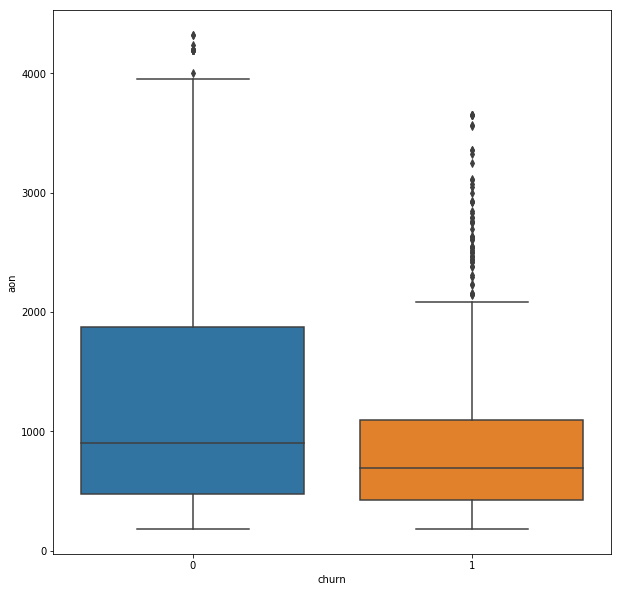

In [663]:
sns.boxplot(filtered_churn.churn,filtered_churn.aon)

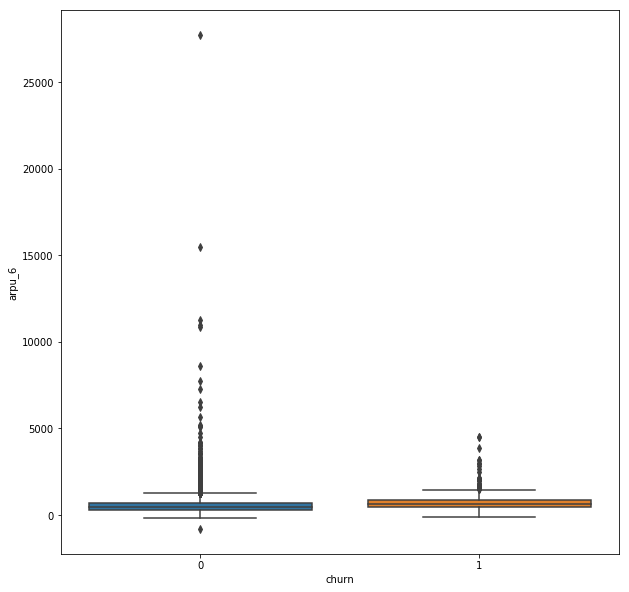

In [664]:
sns.boxplot(filtered_churn.churn,filtered_churn.arpu_6)

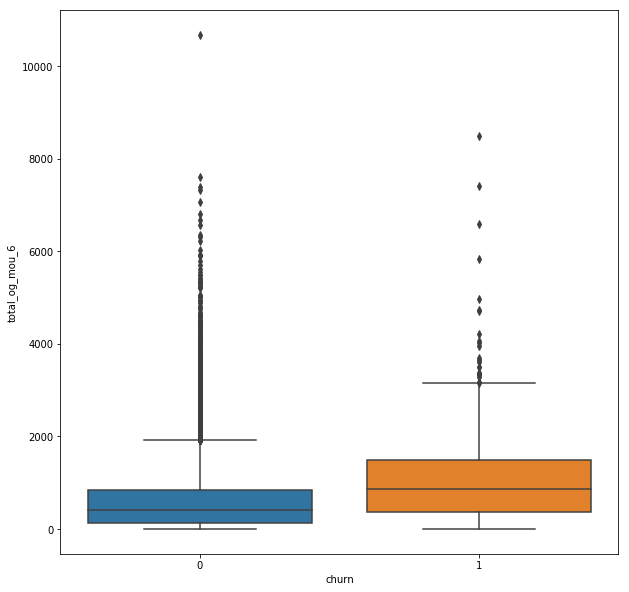

In [665]:
sns.boxplot(filtered_churn.churn,filtered_churn.total_og_mou_6)

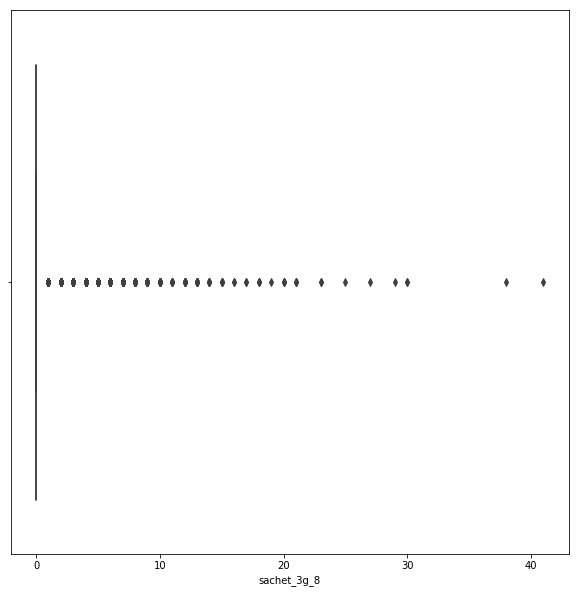

In [666]:
sns.boxplot(filtered_churn.sachet_3g_8)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bb1ed70cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb1ed7a390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb1ed708d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb1ed7aa20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb1ed7ad68>],
 'means': []}

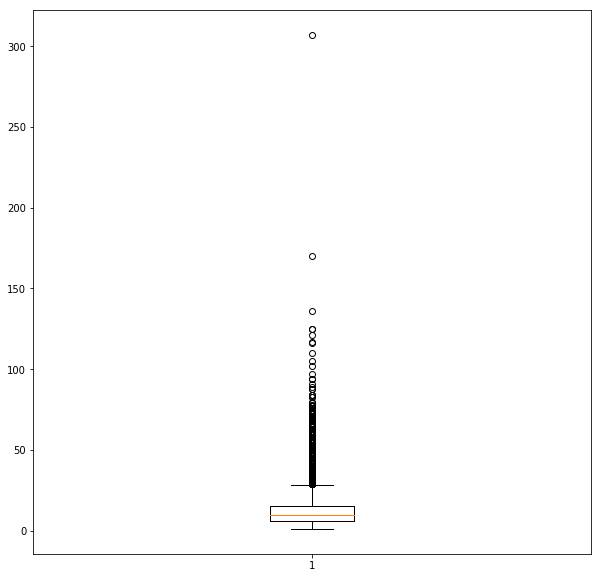

In [667]:
plt.boxplot(filtered_churn['total_rech_num_6'])

#### Based on the above data statistics comparing 99th percentile with max values we see there are outliers for almost many of the columns. We will treat them using below code. 

In [668]:
### Create a list of columns for outlier treatment.

exclude_cols = ['mobile_number','churn']
x_cols = [x for x in filtered_churn.columns if x not in exclude_cols]
x_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [669]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array


In [670]:
filtered_churn[x_cols] = filtered_churn[x_cols].apply(cap_outliers, axis=0)


In [671]:
filtered_churn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.712100e+04,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.000000,27121.0

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [672]:
# Convert churn to numeric
filtered_churn['churn'] = pd.to_numeric(filtered_churn['churn'])

In [673]:
df = filtered_churn[x_cols]
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
2,378.721,492.223000,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.000000,120.0,90.0,154.000000,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,154.000000,23.000000,0.000000,177.000000,69.0,0.00,356.00,0.03,0.000000,750.950000,11.940000,0.0,1.0,0.0,0.0,1.0,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,315.0,21.03,910.650000,122.160000,0.0,5.0,0.000000,1.0,-298.110000,-347.280,48.835,0.0,0.0,-270.095,-38.590,0.000,10.23,-298.450,-36.840,-12.795,0.000,0.0,-49.635,-6.0,-399.000000,-92.0,2.0,-54.000000,-19.500000,-177.970,-363.535000
3,514.453,597.753000,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22.0,26.0,27.0,600.0,680.000000,718.0,50.0,50.000000,50.0,30.0,20.0,50.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.

In [674]:
# Normalizing continuous features

normalized_df = (df - df.mean()) / df.std()
filtered_churn = filtered_churn.drop(df, axis=1)
filtered_churn = pd.concat([filtered_churn, normalized_df], axis=1)
filtered_churn.head()

,mobile_number,churn,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,no_days_last_rech_6,no_days_last_rech_7,no_days_last_rech_8,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
2,7001524846,0,-0.496083,-0.198607,-1.031250,0.448486,0.232326,-0.540618,-0.676239,-0.710931,-0.523557,-0.299885,-0.259756,-0.266032,-0.311446,-0.286177,-0.283462,1.614947,0.986577,-0.460666,-0.393261,-0.460436,-0.535230,-0.442935,-0.44625,-0.443331,-0.357533,-0.352423,1.336659,0.419455,0.109982,-0.598217,-0.110098,-0.087828,-0.385695,-0.482132,-0.494117,-0.247441,-0.244537,-0.236763,-0.240179,-0.387000,-0.382237,-0.408207,-0.115439,-0.117568,-0.108829,-0.491633,-0.51302,0.337843,-0.35972,-0.051639,-0.052611,-0.155445,-0.316225,-0.656514,-0.388773,-0.539615,-0.633329,-0.530267,-0.803179,-0.777475,-0.483187,-0.479534,-0.488032,-0.586331,-0.829278,-0.840968,-0.370851,-0.351246,-0.360593,-0.055948,-0.408021,-0.453698,-0.270943,-0.274348,-0.269731,-0.241376,-0.467417,-0.501730,-0.616268,-0.883298,-0.900255,-0.43518,-0.218784,-0.290327,-0.246114,-0.257619,-0.258326,-0.209254,-0.218891,-0.222589,0.916726,1.127538,0.447550,-0.507455,-0.139987,-1.072589,-0.567205,-0.070924,-1.045284,-0.447180,-0.955214,-0.788724,-0.671022,0.078092,0.558639,-0.775851,0.811199,-0.510264,-0.77071,0.264240,-0.316015,-0.467620,1.004097,-0.438889,-0.497108,0.658356,-0.486267,-0.428583,2.004764,-0.412956,-0.473544,-0.066749,0.915978,-0.388377,-0.391382,-0.388007,-0.30174,-0.296736,-0.272084,-0.963650,-0.423294,2.175863,-0.064861,-0.236172,0.411518,-0.841521,-0.642115,-1.008318,-1.457182,0.294976,0.046972,0.053466,-1.603038,-0.020757,0.023732,0.856442,-0.629779,-0.251082,-0.194271,-0.000771,0.102799,-0.267340,-0.829580,-1.042005,-1.046268,1.160622,-0.790271,-0.097825,-0.866783,-0.844023

### Checking the Churn Rate



In [675]:
# print churn rate
print("Churn Rate:")
print(filtered_churn.churn.value_counts()*100/filtered_churn.shape[0])

Churn Rate:
0    97.326795
1     2.673205
Name: churn, dtype: float64


In [676]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = filtered_churn.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = filtered_churn['churn']

y.head()

2    0
3    0
4    0
5    0
6    0
Name: churn, dtype: int64

In [677]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [678]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PCA & Logistic Regression without Class imbalance
#### Applying principal component analysis on the train dataset

In [679]:
X_train.shape

(18984, 160)

In [680]:
X_test.shape

(8137, 160)

In [681]:
# apply pca to train data
pca = PCA(random_state=42)


In [682]:
pca.fit(X_train)



PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [683]:
pca.explained_variance_ratio_

array([1.09766654e-01, 9.13664034e-02, 5.63344141e-02, 4.87626465e-02,
       3.96263913e-02, 3.81269118e-02, 2.85611365e-02, 2.46465238e-02,
       2.38619435e-02, 2.19434655e-02, 2.05265171e-02, 1.87982178e-02,
       1.79628443e-02, 1.77111330e-02, 1.67207731e-02, 1.51374779e-02,
       1.42941245e-02, 1.40940339e-02, 1.31993092e-02, 1.25550590e-02,
       1.20239377e-02, 1.19288167e-02, 1.13832655e-02, 1.10779874e-02,
       1.04912557e-02, 9.89862358e-03, 9.73709238e-03, 9.24958638e-03,
       9.10011380e-03, 8.93016982e-03, 8.44943043e-03, 8.21017383e-03,
       7.89286883e-03, 7.49337360e-03, 7.48002481e-03, 7.15318325e-03,
       7.11070680e-03, 7.03743941e-03, 6.62780101e-03, 6.34169821e-03,
       6.19349566e-03, 5.72268018e-03, 5.58420803e-03, 5.52411198e-03,
       5.10046795e-03, 5.02549828e-03, 4.94052642e-03, 4.86332801e-03,
       4.80751226e-03, 4.67380886e-03, 4.58138993e-03, 4.38390576e-03,
       3.98746732e-03, 3.93130108e-03, 3.87859936e-03, 3.80075304e-03,
      

#### Making a scree plot for the explained variance

In [684]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.10976665, 0.20113306, 0.25746747, 0.30623012, 0.34585651,
       0.38398342, 0.41254456, 0.43719108, 0.46105302, 0.48299649,
       0.50352301, 0.52232122, 0.54028407, 0.5579952 , 0.57471597,
       0.58985345, 0.60414758, 0.61824161, 0.63144092, 0.64399598,
       0.65601992, 0.66794873, 0.679332  , 0.69040999, 0.70090124,
       0.71079987, 0.72053696, 0.72978654, 0.73888666, 0.74781683,
       0.75626626, 0.76447643, 0.7723693 , 0.77986268, 0.7873427 ,
       0.79449588, 0.80160659, 0.80864403, 0.81527183, 0.82161353,
       0.82780702, 0.8335297 , 0.83911391, 0.84463802, 0.84973849,
       0.85476399, 0.85970452, 0.86456785, 0.86937536, 0.87404917,
       0.87863056, 0.88301446, 0.88700193, 0.89093323, 0.89481183,
       0.89861258, 0.90221894, 0.90568983, 0.90903573, 0.91236606,
       0.91563593, 0.91872857, 0.92176866, 0.9247046 , 0.92758955,
       0.93043301, 0.93320842, 0.93585119, 0.93844247, 0.94100173,
       0.94338564, 0.94561273, 0.94782084, 0.9499614 , 0.95208

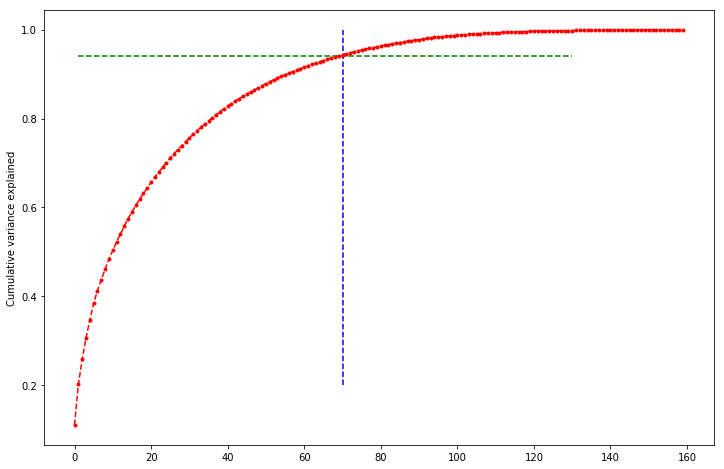

In [685]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=70, ymax=1, ymin=0.2, colors="b", linestyles="--")
plt.hlines(y=0.94, xmax=130, xmin=1, colors="g", linestyles="--")
plt.plot(var_cumu,marker=".", color="r",linestyle ="--")
plt.ylabel("Cumulative variance explained")
plt.show()

#### PCA with '70' components

In [686]:
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=70)

In [687]:
df_train_pca = pca_final.fit_transform(X_train)

In [688]:
df_train_pca.shape

(18984, 70)

#### Creating and plotting a correlation matrix for the principal components

In [689]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [690]:
corrmat.shape

(70, 70)

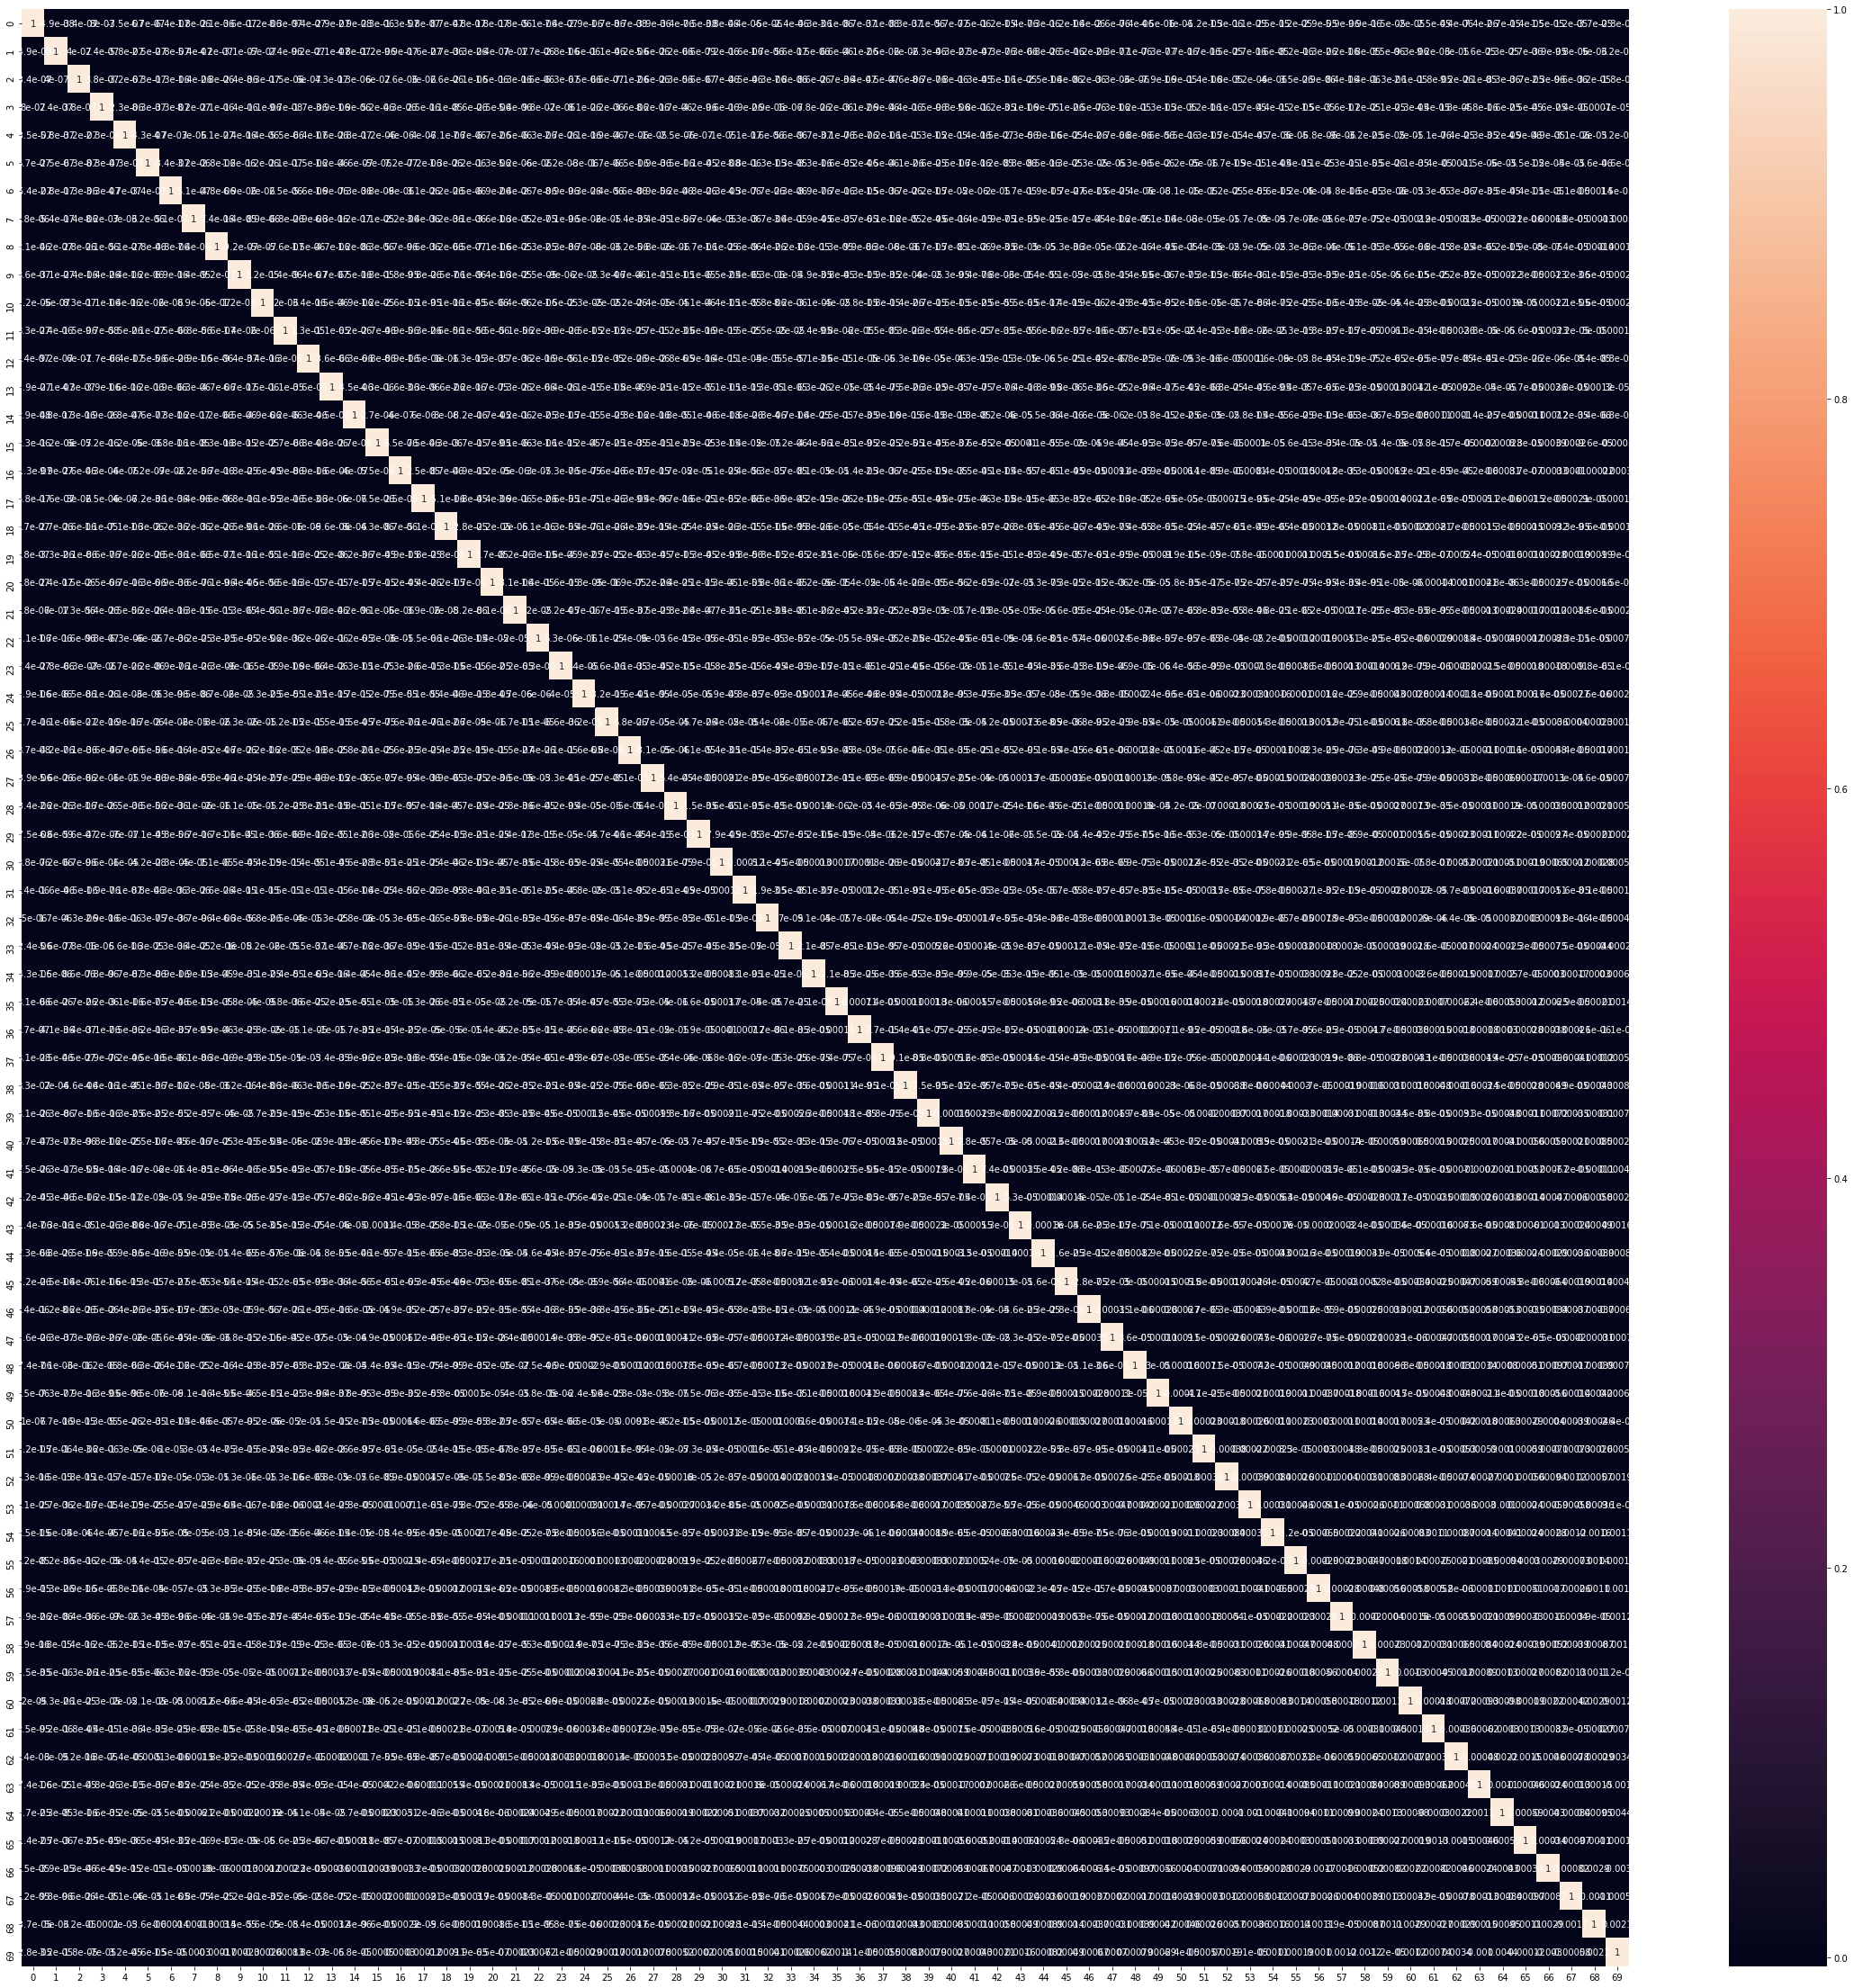

In [691]:
plt.figure(figsize=[40,40])
sns.heatmap(corrmat, annot=True)

<font color = purple> *It's clear from the correlation matrix above that none of the 70 variables are correlated with each other.* </font>

#### Applying the transformation on the test set

In [692]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8137, 70)

In [693]:
df_test_pca

array([[-4.76131568, -1.48391684,  1.58969649, ...,  0.36045497,
         1.0687425 , -0.96841452],
       [ 4.11337114, -3.7565338 , -3.41969865, ..., -1.46732049,
         0.88654657, -1.06490152],
       [ 3.79723913,  2.85282921, -0.72425596, ...,  0.02430661,
        -0.54218833,  0.44002413],
       ...,
       [-1.01195979,  4.6999868 , -2.11511502, ...,  0.18740931,
         0.04423448, -0.55635075],
       [ 1.07783566,  4.88132319,  4.64685427, ...,  0.117057  ,
        -0.1943571 ,  0.08368172],
       [-0.95962952, -6.55603054,  4.18683068, ...,  0.09101303,
         0.08757825, -0.74227999]])

## Logistic Regression
#### Applying logistic regression on our principal components data

In [694]:
logreg = LogisticRegression()
logreg.fit(df_train_pca, y_train)

y_pred = logreg.predict(df_test_pca)
print('Accuracy: {0}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9732087993117857
Recall/Sensitivity: 0.15217391304347827


In [695]:
# What is the sensitivity of the model using L2 regularization?
logreg = LogisticRegression(penalty = 'l2', C=0.1, class_weight={0:0.4, 1:0.6})
logreg.fit(df_train_pca, y_train)

y_pred = logreg.predict(df_test_pca)
print('Accuracy: {0}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.9728401130637827
Recall/Sensitivity: 0.25217391304347825


<font color = purple> The AUC & Recall or sensitivity scores are very less otherwise the model is overfit due to data imbalance. We will proceed with grid search and class balance to get better scores in training data set and evaluate on the test dataset.

#### Logistic regression with Class 'Balanced'

In [698]:
params = {'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 2], 
         'penalty':['l1', 'l2'], 
         'class_weight': ['balanced', {0:0.4, 1:0.6}]}
logmodel = LogisticRegression()
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator = logmodel, cv = 5, 
                     param_grid = params, scoring = 'recall')
model.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'class_weight': ['balanced', {0: 0.4, 1: 0.6}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', 

In [699]:
# print best hyperparameters
cm = confusion_matrix(y_test, y_pred)
print(cm)


print("Best AUC: ", model.best_score_)
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))
print("Best hyperparameters: ", model.best_params_)

[[7858   49]
 [ 172   58]]
Best AUC:  0.8505050505050505
Recall/Sensitivity: 0.25217391304347825
Best hyperparameters:  {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}


<font color = purple> Scores on Training data set with Penalty L2 & AUC scores are 85%

#### Predict on test data set using same parameters

In [700]:
logreg = LogisticRegression(penalty = 'l2', C=0.1, class_weight='balanced')
logreg.fit(df_train_pca, y_train)

y_pred = logreg.predict(df_test_pca)
print('Accuracy: {0}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8548605137028389
Recall/Sensitivity: 0.8608695652173913


In [701]:
# print best hyperparameters
cm = confusion_matrix(y_test, y_pred)
print(cm)


print("Best AUC: ", model.best_score_)
print('Recall/Sensitivity: {0}'.format(metrics.recall_score(y_test, y_pred)))
print("Best hyperparameters: ", model.best_params_)

[[6758 1149]
 [  32  198]]
Best AUC:  0.8505050505050505
Recall/Sensitivity: 0.8608695652173913
Best hyperparameters:  {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}


<font color =purple> Based on the above scores the logistic regression model ensures best fit  with 
    Accuracy = 85%
    Recall/Sensitivity = 86%

In [703]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [704]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [705]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9653186061697676
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [706]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7861   46]
 [ 177   53]]
Sensitivity: 	0.23
Specificity: 	0.99
AUC:    	 0.96


<Font color = purple> The above results show that the best model is PCA with Logistic Regression because of Poor Sensitivity.

### Choosing the Best Features

In [707]:
# Run Random forest model on train data

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [708]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [709]:
# OOB score
rf_model.oob_score_

0.9753476611883691

In [710]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


[[7862   45]
 [ 178   52]]
Sensitivity: 	0.23
Specificity: 	0.99
ROC:    	 0.97


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


### Feature Importance

In [711]:
# predictors
features =  filtered_churn.drop(['churn','mobile_number'],axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'Variables': features, 'Importance_percentage': importance*100})
feature_importance = feature_importance[['Variables', 'Importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('Importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of Importance=", feature_importance.Importance_percentage.sum())
feature_importance

Sum of Importance= 100.0


,Variables,Importance_percentage
0,roam_ic_mou_8,8.408235
1,roam_og_mou_8,8.162964
2,loc_ic_t2m_mou_8,5.146802
3,total_ic_mou_8,5.038212
4,roam_ic_mou_diff,4.587209
5,loc_ic_mou_8,3.966741
6,roam_og_mou_diff,3.505914
7,loc_ic_t2t_mou_8,2.511380
8,total_og_mou_8,2.367505
9,loc_og_mou_8,2.255129


In [712]:
# extract top 'n' features
top_n = 10
top_features = feature_importance.Variables[0:top_n]
top_features

0       roam_ic_mou_8
1       roam_og_mou_8
2    loc_ic_t2m_mou_8
3      total_ic_mou_8
4    roam_ic_mou_diff
5        loc_ic_mou_8
6    roam_og_mou_diff
7    loc_ic_t2t_mou_8
8      total_og_mou_8
9        loc_og_mou_8
Name: Variables, dtype: object

In [713]:
top_features = ['roam_ic_mou_8','roam_og_mou_8','loc_ic_t2m_mou_8','total_ic_mou_8','roam_ic_mou_diff','loc_ic_mou_8','roam_og_mou_diff',
                'loc_ic_t2t_mou_8','total_og_mou_8','loc_og_mou_8']
top_features

['roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2m_mou_8',
 'total_ic_mou_8',
 'roam_ic_mou_diff',
 'loc_ic_mou_8',
 'roam_og_mou_diff',
 'loc_ic_t2t_mou_8',
 'total_og_mou_8',
 'loc_og_mou_8']

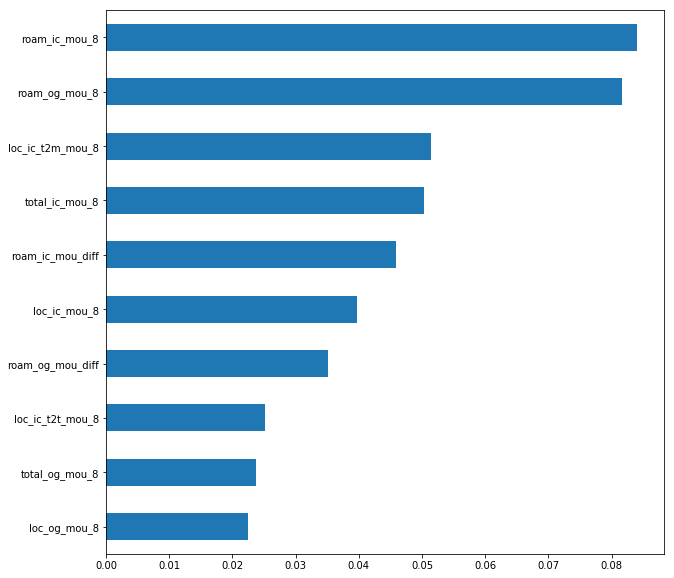

In [714]:
importances = rf_model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')


In [715]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [716]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
      

In [717]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9180941654057051
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [718]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7555  352]
 [  74  156]]
Sensitivity: 	0.68
Specificity: 	0.96
ROC:    	 0.93


### Find the intercept and the coefficients from the logistic model

In [719]:
logistic_model = model.best_estimator_.named_steps['logistic']


In [720]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])


In [721]:
# coefficients
coefficients = logistic_model.coef_.tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [722]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
top = coefficients[top_features]

In [723]:
top

,roam_ic_mou_8,roam_og_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,roam_ic_mou_diff,loc_ic_mou_8,roam_og_mou_diff,loc_ic_t2t_mou_8,total_og_mou_8,loc_og_mou_8
0,0.145623,0.328478,-0.187797,-0.103233,-0.096392,-0.203955,0.143203,-0.101792,-0.079418,-0.000568


<font color=Red>**Business Insights:
    
        1. Telecom company needs to pay attention to the roaming rates. 
        2. They need to provide good offers to the customers who are using services from a roaming zone.
        3. The company needs to focus on local calls to other operators, out going charges. Perhaps, the rates are too high. 
        4. Provide them with some kind of discounted STD and ISD packages or reduce the rates of roaming charges to other                  operators both landline & mobiles.
        5. It is desired that the telecom company collects customer query and complaint data and work on their services    according to the needs of customers.

### End of Case Study